<a href="https://colab.research.google.com/github/SrinathMLOps/Dissertation/blob/main/DataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import Libraries

Before I can simulate anything, I need to import the libraries that will help me:

- `random`: to simulate the randomness of the roulette wheel.
- `pandas`: to store the spin results in a table and save them as a CSV file.

These are the only two libraries I need for now.


In [1]:
#Importing necessary libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Build the European Roulette Simulator

Here I’m creating a class called `EuropeanRoulette`. This class represents a real European roulette wheel.

It does the following:
- Sets up all numbers from 0 to 36.
- Assigns a color (red, black, or green) to each number — just like a real roulette wheel.
- Lets me add different kinds of bias:
    - **Number bias** (e.g., number 17 appears more often).
    - **Color bias** (e.g., more red than black).
    - **Range bias** (e.g., more low numbers like 1–12).

This is useful for reinforcement learning because I can train models on both fair and biased datasets.


In [2]:
class EuropeanRoulette:
    """
    I'm simulating a European roulette wheel with the option to introduce bias.
    Bias lets me favor certain numbers more often, which is useful for training RL models.
    """
    def __init__(self, bias_type=None, bias_target=None, bias_strength=0.1):
        """
        Parameters:
        - bias_type: 'number', 'color', or 'range'
        - bias_target: depends on type (e.g., 17, 'red', or (1,12))
        - bias_strength: how strong the bias is (0.1 = 10% of the time, override random)
        """
        self.numbers = list(range(37))
        self.colors = self._assign_colors()

        # Save bias settings
        self.bias_type = bias_type
        self.bias_target = bias_target
        self.bias_strength = bias_strength

    def _assign_colors(self):
        """
        I'm assigning colors based on real roulette coloring.
        """
        red = {1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36}
        return {
            num: 'green' if num == 0 else 'red' if num in red else 'black'
            for num in self.numbers
        }

    def spin(self):
        """
        Simulate a spin, with an optional bias injected based on the user setting.
        """
        apply_bias = self.bias_type is not None and random.random() < self.bias_strength

        if apply_bias:
            # I'm applying bias depending on the chosen type
            if self.bias_type == 'number':
                result = self.bias_target  # Always return the biased number
            elif self.bias_type == 'color':
                # I’ll filter all numbers of that color and pick one randomly
                eligible = [n for n in self.numbers if self.colors[n] == self.bias_target]
                result = random.choice(eligible)
            elif self.bias_type == 'range':
                # Range bias (e.g., (1, 12))
                low, high = self.bias_target
                eligible = [n for n in self.numbers if low <= n <= high]
                result = random.choice(eligible)
            else:
                result = random.choice(self.numbers)  # fallback
        else:
            # No bias applied — just a fair spin
            result = random.choice(self.numbers)

        return result, self.colors[result]


### Step 3: Simulate Spins and Create a Dataset

Now I’m going to simulate a large number of roulette spins — in this case, 100,000.

Before the loop, I create a `wheel` object using the `EuropeanRoulette` class. I can choose:
- A fair wheel (no bias).
- A biased wheel (e.g., favoring red or low numbers).

Inside the loop, I spin the wheel and record:
- The spin number
- The outcome number (0 to 36)
- Its color (red, black, or green)

All the spins are saved in a list, which I later convert into a DataFrame.


In [3]:
# You can tweak these to generate different datasets
num_spins = 100_000

# Example 1: Fair roulette (no bias)
# wheel = EuropeanRoulette()

# Example 2: Add bias toward number 17 (more frequent than it should be)
# wheel = EuropeanRoulette(bias_type='number', bias_target=17, bias_strength=0.05)

# Example 3: Add bias toward red numbers
# wheel = EuropeanRoulette(bias_type='color', bias_target='red', bias_strength=0.10)

# Example 4: Add bias toward low numbers (1–12)
wheel = EuropeanRoulette(bias_type='range', bias_target=(1, 12), bias_strength=0.15)

# I'll use this list to store each spin result
spin_data = []

for i in range(num_spins):
    number, color = wheel.spin()
    spin_data.append({
        "Spin": i + 1,
        "Number": number,
        "Color": color
    })

# Convert to DataFrame and save to CSV
df = pd.DataFrame(spin_data)

### Step 4: Save the Spin Data to a CSV File

After simulating all the spins, I save the results into a `.csv` file using pandas.

The filename includes the type of bias used (e.g., `roulette_spin_data_fair.csv` or `roulette_spin_data_color.csv`) so I can easily tell them apart later.

This dataset will be useful for:
- Training my reinforcement learning agent.
- Comparing how it performs on fair vs biased data.

In [4]:
# I'll name the file based on the bias for clarity
bias_name = wheel.bias_type if wheel.bias_type else "fair"
df.to_csv(f"roulette_spin_data_{bias_name}.csv", index=False)

# Just checking the top of the dataset
df.head()

,Spin,Number,Color
0,1,8,black
1,2,29,black
2,3,9,red
3,4,26,black
4,5,26,black


### Summary

In this notebook, I:

1. Simulated a European roulette wheel with optional bias.
2. Generated thousands of realistic spin results.
3. Saved the data into CSV files for use in machine learning or analysis.

Next steps I might explore:
- Visualize the distribution of outcomes.
- Create an OpenAI Gym-style environment using this data.
- Train a reinforcement learning model to learn patterns (if any) from biased spins.

This setup gives me a flexible foundation to test how RL agents respond to both fair and unfair conditions.


/tmp/ipython-input-5-2419127583.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Number', data=df, palette='viridis')


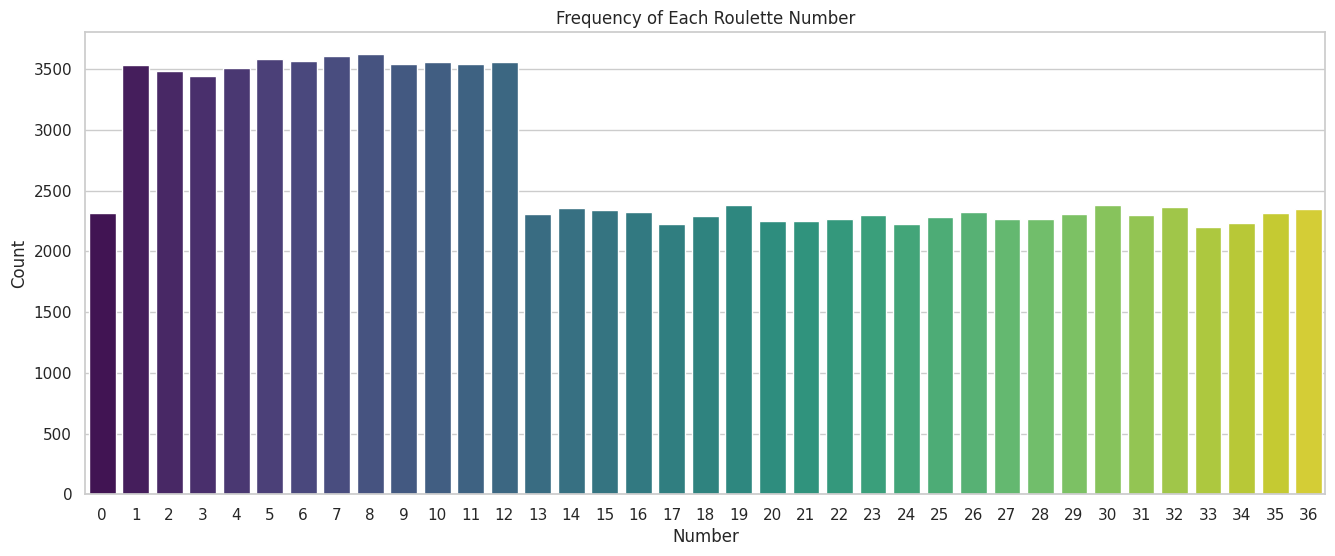

In [5]:
# I want the plots to look nicer and be easy to interpret
sns.set(style="whitegrid")

# Plot 1: Frequency of each number (0-36)
plt.figure(figsize=(16,6))
sns.countplot(x='Number', data=df, palette='viridis')
plt.title("Frequency of Each Roulette Number")
plt.xlabel("Number")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-6-1981108768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Color', data=df, order=['green', 'red', 'black'], palette=['green', 'red', 'black'])


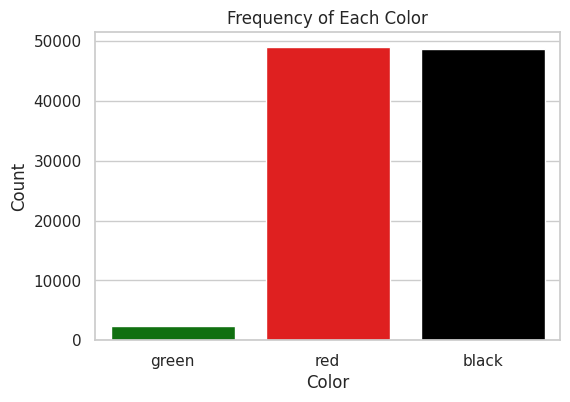

In [6]:
# Plot 2: Frequency of each color
plt.figure(figsize=(6,4))
sns.countplot(x='Color', data=df, order=['green', 'red', 'black'], palette=['green', 'red', 'black'])
plt.title("Frequency of Each Color")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

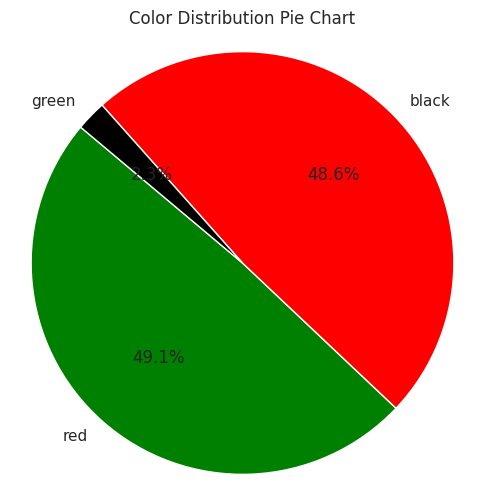

In [7]:
# Plot 3: Pie chart of color distribution
color_counts = df['Color'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(color_counts, labels=color_counts.index, colors=['green', 'red', 'black'], autopct='%1.1f%%', startangle=140)
plt.title("Color Distribution Pie Chart")
plt.axis('equal')  # Keep the pie chart circular
plt.show()